In [1]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from IPython.display import Image
from PIL import Image
import numpy as np
import pandas as pd

In [2]:
from sklearn.feature_extraction.text import CountVectorizer
from keras_tuner.tuners import RandomSearch

In [3]:
train_image_generator = ImageDataGenerator(rescale = 1.0/255)
test_image_generator = ImageDataGenerator(rescale = 1.0/255)

In [4]:
training_images = train_image_generator.flow_from_directory(
                                                           'Covid19Dataset/train',
                                                           target_size = (64,64),
                                                           batch_size = 8,
                                                           class_mode = 'binary')
testing_images = test_image_generator.flow_from_directory('Covid19Dataset/test',
                                                           target_size = (64,64),
                                                           batch_size = 8,
                                                           class_mode = 'binary')

Found 130 images belonging to 2 classes.
Found 18 images belonging to 2 classes.


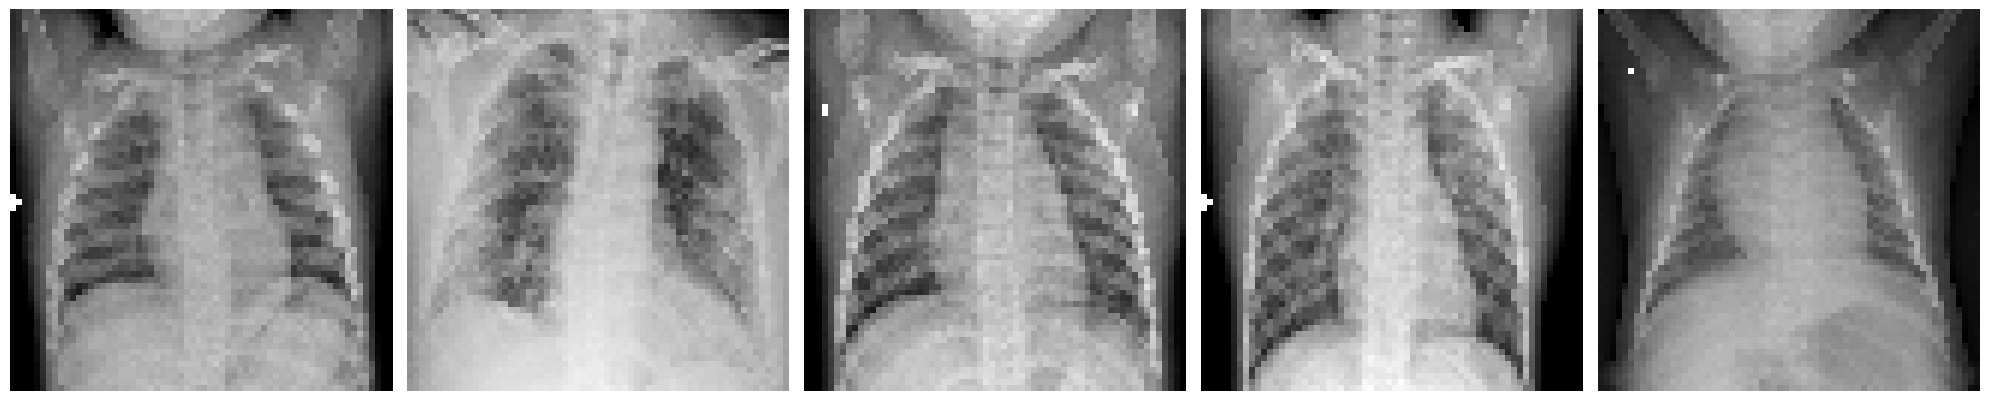

In [5]:
def plotImages(images):
    fig, axes = plt.subplots(1,5,figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip(images, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

sample_training_images, _ = next(training_images)
plotImages(sample_training_images[:5])

In [6]:
# Creation of CNN Model
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

# Further Adding the NeuralNet in ConvNet Model
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [7]:
# TRAINING OF A MODEL
model.compile(optimizer='adam', loss = 'binary_crossentropy', metrics = ['accuracy', tf.keras.metrics.Precision(), tf.keras.metrics.Recall()])

In [8]:
history = model.fit_generator(training_images, epochs = 10, validation_data = testing_images)

C:\Users\PZS0098\AppData\Local\Temp\ipykernel_6360\1527055681.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(training_images, epochs = 10, validation_data = testing_images)


Epoch 1/10
17/17 [==============================] - 5s 206ms/step - loss: 0.6859 - accuracy: 0.5538 - precision: 0.5732 - recall: 0.6714 - val_loss: 0.6860 - val_accuracy: 0.5000 - val_precision: 0.5000 - val_recall: 1.0000
Epoch 2/10
17/17 [==============================] - 4s 211ms/step - loss: 0.6552 - accuracy: 0.5385 - precision: 0.5385 - recall: 1.0000 - val_loss: 0.5865 - val_accuracy: 0.5000 - val_precision: 0.5000 - val_recall: 1.0000
Epoch 3/10
17/17 [==============================] - 3s 193ms/step - loss: 0.4077 - accuracy: 0.8154 - precision: 0.7500 - recall: 0.9857 - val_loss: 0.1780 - val_accuracy: 1.0000 - val_precision: 1.0000 - val_recall: 1.0000
Epoch 4/10
17/17 [==============================] - 3s 178ms/step - loss: 0.1380 - accuracy: 0.9385 - precision: 0.9429 - recall: 0.9429 - val_loss: 0.0292 - val_accuracy: 1.0000 - val_precision: 1.0000 - val_recall: 1.0000
Epoch 5/10
17/17 [==============================] - 3s 174ms/step - loss: 0.1246 - accuracy: 0.9769 - pr

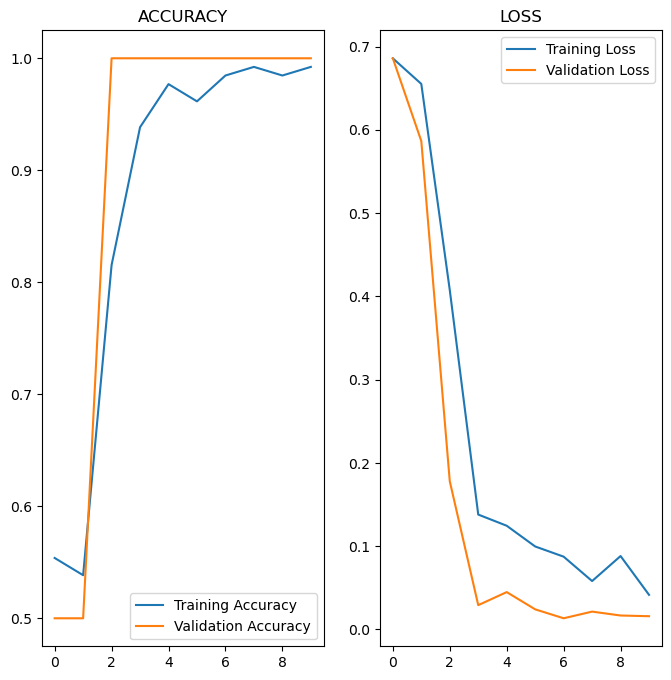

In [9]:
# Visualizing loss and accuracy
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(10)

plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(epochs_range, acc, label = 'Training Accuracy')
plt.plot(epochs_range, val_acc, label = 'Validation Accuracy')
plt.legend(loc='lower right')
plt.title('ACCURACY')

plt.subplot(1,2,2)
plt.plot(epochs_range, loss, label = 'Training Loss')
plt.plot(epochs_range, val_loss, label = 'Validation Loss')
plt.legend(loc='upper right')
plt.title('LOSS')

plt.show()

In [10]:
# Saving the model
model.save('model.h5')

In [12]:
from tensorflow.keras.models import load_model
import cv2
import numpy as np

# We need not to create and train the model again
# No need to train the model, its a pre defined trained model
model = load_model("model.h5")
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Testing the Normal Image
image = cv2.imread("Covid19Dataset/test/normal/NORMAL2-IM-1385-0001.jpeg")    # 1
# image = cv2.imread("covid19dataset/test/covid/nejmoa2001191_f3-PA.jpeg")    # 0
image = cv2.resize(image, (64, 64))
image = np.reshape(image, [1, 64, 64, 3])

# classes = model.predict_classes(image)
classes = (model.predict(image) > 0.5).astype("int32")
label = ["COVID-19 INFECTED", "NORMAL"]
print(classes)
print(label[classes[0][0]])

1/1 [==============================] - 0s 62ms/step
[[1]]
NORMAL
